# Exploratory Data Analysis (EDA) of wine.csv

In [1]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('wine.csv')

## Cleaning the dataset

In [3]:
# Spelling fixes
df['province'] = df['province'].replace('Alentejano', 'Alentejo')
df['province'] = df['province'].replace('Beiras', 'Beira Atlantico')
df['province'] = df['province'].replace('Curic√≥ Valley', 'Curico Valley')
df['province'] = df['province'].replace('D√£o', 'Dao')
df['province'] = df['province'].replace('Terras do D√£o', 'Dao')
df['province'] = df['province'].replace('Limar√≠ Valley', 'Limari Valley')
df['province'] = df['province'].replace('Pen√≠nsula de Set√∫bal', 'Peninsula de Setubal')
df['province'] = df['province'].replace('Rh√¥ne Valley', 'Rhine Valley')
df['province'] = df['province'].replace('W√ºrttemberg', 'Wurttemberg')

In [4]:
# Looking for typos
unique_provinces = df['province'].unique()
unique_provinces.sort()  # sorts the array alphabetically
print(unique_provinces)

['Aconcagua Valley' 'Ahr' 'Alentejo' 'Alsace' 'Andalucia'
 'Atalanti Valley' 'Baden' 'Bairrada' 'Beaujolais' 'Beira Atlantico'
 'Bordeaux' 'British Columbia' 'Bulgaria' 'Burgenland' 'Burgundy'
 'Cachapoal Valley' 'California' 'Carnuntum' 'Casablanca Valley'
 'Catalonia' 'Central Spain' 'Champagne' 'Colchagua Valley'
 'Colinele Dobrogei' 'Curico Valley' 'Dao' 'Dealurile Munteniei' 'Douro'
 'Duriense' 'Florina' 'France Other' 'Galicia' 'Galilee' 'Golan Heights'
 'Goriska Brda' 'Guerrouane' 'Idaho' 'Italy Other' 'Judean Hills' 'Kumeu'
 'Languedoc-Roussillon' 'Levante' 'Leyda Valley' 'Limari Valley' 'Lisboa'
 'Loire Valley' 'Lombardy' 'Maipo Valley' 'Marchigue' 'Maule Valley'
 'Mendoza Province' 'Moldova' 'Mosel' 'Nahe' 'Nemea' 'New York'
 'North Dalmatia' 'Northeastern Italy' 'Northern Spain' 'Ontario' 'Oregon'
 'Other' 'Overberg' 'Peloponnese' 'Peninsula de Setubal' 'Peumo'
 'Piedmont' 'Portuguese Table Wine' 'Provence' 'Rheingau' 'Rheinhessen'
 'Rhine Valley' 'Robertson' 'Santorini' 'Si

In [5]:
# Drop duplicate rows based on all columns
df = df.drop_duplicates()

## Finding missing values

In [6]:
# Counting the NaN values in the dataset.
df.isna().sum()

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

In [7]:
# Check if missing values is correlated with other values

# Create a list of column names with missing values
missing_cols = ['designation', 'region_1', 'region_2']

# Create new columns for each of the columns with missing values and calculate the correlation
for col in missing_cols:
    new_col_name = col + '_missing'
    df[new_col_name] = df[col].isna()  # Create new columns for each of the columns with missing values
    corr = df[new_col_name].corr(df['points'])  # Calculate the correlation between each of the new columns and another column in the dataset
    print(f'Correlation between {new_col_name} and points:', corr)  # Print the correlation coefficients

Correlation between designation_missing and points: -0.20390750829132265
Correlation between region_1_missing and points: -0.08910636080382701
Correlation between region_2_missing and points: -0.09751956007493531


In [8]:
# Get the list of column names
columns_list = df.columns.tolist()

# Print the list of column names
print(columns_list)

['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery', 'designation_missing', 'region_1_missing', 'region_2_missing']


In [9]:
# Calculating total number of rows in dataset to see if I can drop rows that are missing data
print(len(df))

1103


In [10]:
# Checking if number of entries missing data in 'region_1' is over represented in any particular province.
df.groupby(['province', 'region_1_missing']).size().sort_values(ascending=False)

province      region_1_missing
California    False               350
Oregon        False                77
Tuscany       False                67
Piedmont      False                58
Washington    False                48
                                 ... 
Nahe          True                  1
Ontario       False                 1
Overberg      True                  1
Peloponnese   True                  1
Maule Valley  True                  1
Length: 98, dtype: int64

In [11]:
# Get frequency of missing values for each province
province_missing_freq = df.groupby('province')['region_1_missing'].sum()

# Get percentage of missing values for each province
province_missing_pct = province_missing_freq / df.groupby('province')['region_1_missing'].count() * 100

# Sort values by percentage of missing values
province_missing_pct_sorted = province_missing_pct.sort_values(ascending=False)

# Print the sorted values
print(province_missing_pct_sorted)

province
Aconcagua Valley    100.0
Moldova             100.0
Peloponnese         100.0
Overberg            100.0
North Dalmatia      100.0
                    ...  
Loire Valley          0.0
Rhine Valley          0.0
Burgundy              0.0
France Other          0.0
Piedmont              0.0
Name: region_1_missing, Length: 97, dtype: float64


In [12]:
# Drop columns missing too much data
df = df.drop(columns=['region_2'])

# Drop columns created just to check things
df = df.drop(columns=['designation_missing', 'region_1_missing', 'region_2_missing'])

# Drop the unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
# Adding columns I want to use for later analysis

# Get the count of each province
province_counts = df['province'].value_counts()

# Add a new column to the dataframe with the province frequency
df['province_freq'] = df['province'].map(province_counts)

# Column with description word count
df['description_wordcount'] = df['description'].apply(lambda x: len(x.split()))

In [14]:
df.head()

,country,description,designation,points,price,province,region_1,variety,winery,province_freq,description_wordcount
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,350,60
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodr√≠guez,33,51
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,350,47
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,77,62
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la B√©gude,10,66


## Exploration

In [15]:
# Getting descriptive statistics for columns
df.describe()

,points,price,province_freq,description_wordcount
count,1103.000000,1046.000000,1103.000000,1103.000000
mean,89.701723,40.242830,133.832276,42.310063
std,2.390405,32.588141,148.891597,9.606597
min,85.000000,7.000000,1.000000,19.000000
25%,88.000000,20.000000,18.000000,36.000000
50%,90.000000,31.000000,58.000000,42.000000
75%,91.000000,50.000000,350.000000,48.000000
max,96.000000,500.000000,350.000000,82.000000


In [16]:
# Correlation of column
df.corr()['points']

C:\Users\CA\AppData\Local\Temp\ipykernel_18608\64547374.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['points']


points                   1.000000
price                    0.437145
province_freq            0.084211
description_wordcount    0.473763
Name: points, dtype: float64

C:\Users\CA\AppData\Local\Temp\ipykernel_18608\2469466935.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


Text(0.5, 1.0, 'Correlation for Wine Data')

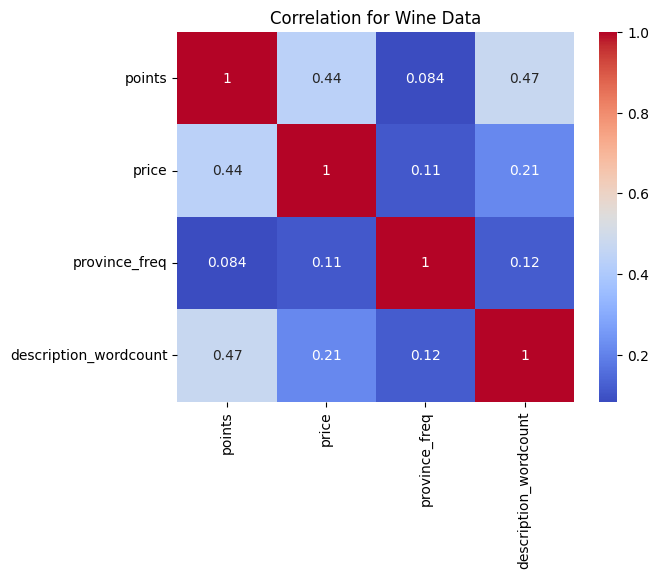

In [17]:
# Create a heatmap to visualize the correlations
ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Add a title to the heatmap
ax.set_title('Correlation for Wine Data')

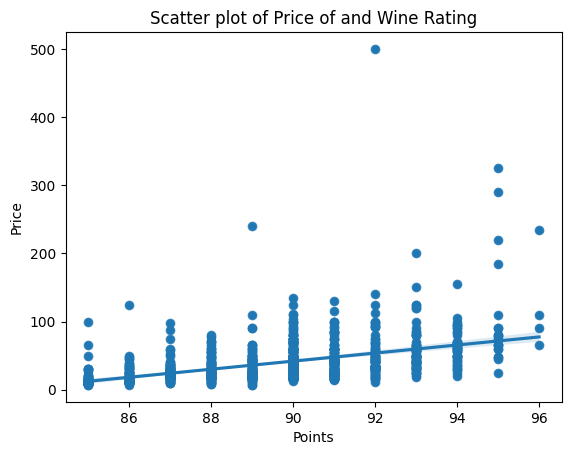

In [18]:
# Create a scatter plot
sns.scatterplot(data=df, x='points', y='price')

# Add a line of best fit to the scatter plot
sns.regplot(data=df, x='points', y='price')

# Set the plot title and axis labels
plt.title('Scatter plot of Price of and Wine Rating')
plt.xlabel('Points')
plt.ylabel('Price')

# Display the plot
plt.show()

In [19]:
# List of the 5 provinces with the highest frequency
top_provinces = df['province'].value_counts().nlargest(5).index.tolist()

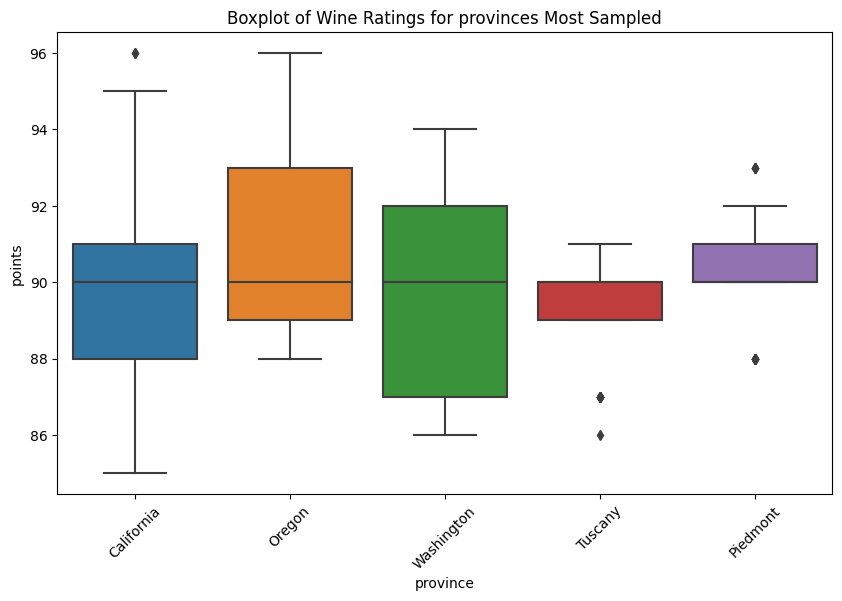

In [20]:
# Subset the dataframe to only include rows for the top provinces
top_province_df = df[df['province'].isin(top_provinces)]

# Boxplot of points for provinces most sampled
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_province_df, x='province', y='points')
plt.xticks(rotation=45)
plt.title('Boxplot of Wine Ratings for provinces Most Sampled')
plt.show()

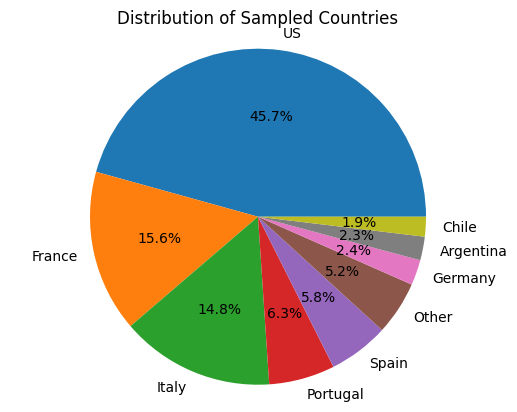

In [21]:
# Get value counts for each country
country_counts = df['country'].value_counts(normalize=True)

# Create a new column with adjusted country values
df['country_adjusted'] = df['country'].apply(lambda x: x if country_counts[x] > 0.01 else 'Other')

# Get value counts for the adjusted country column
adjusted_counts = df['country_adjusted'].value_counts()

# Create pie chart
plt.pie(adjusted_counts, labels=adjusted_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Sampled Countries')
plt.show()

In [22]:
# Filter the dataset to only contain “Cabernet Sauvignon”, “Pinot Noir” and “Chardonnay” wines
filtered_wines = df[df['variety'].isin(['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay'])]

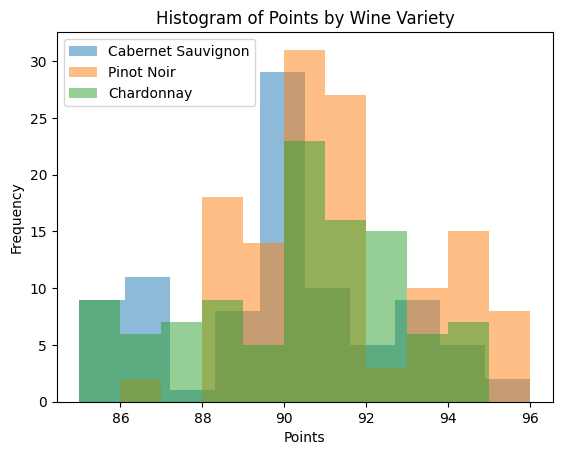

In [23]:
# Define the wine varieties of interest
wine_varieties = ['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay']

# Create a separate histogram plot for each wine variety
for variety in wine_varieties:
    plt.hist(df.loc[df['variety'] == variety, 'points'], alpha=0.5, label=variety)

# Add labels and legend to the plot
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Histogram of Points by Wine Variety')
plt.legend()

# Show the plot
plt.show()

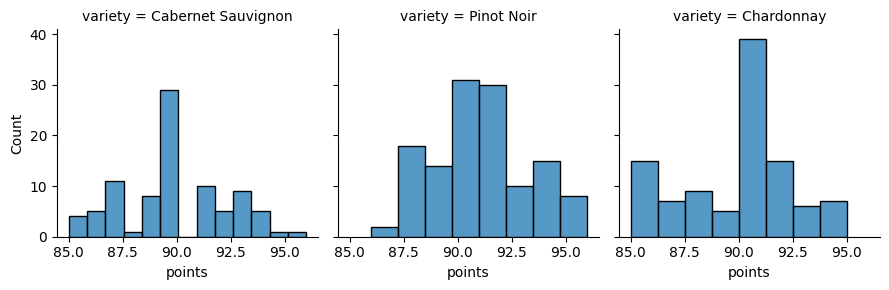

In [24]:
# Create a temporary dataframe that filters the variety column
temp_df = df[df['variety'].isin(['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay'])]

# Creating a multi plot grid
g = sns.FacetGrid(temp_df, col="variety", col_wrap=3)
g.map(sns.histplot, "points")
plt.show()

## Word Clouds of the Province and the variety of the wine

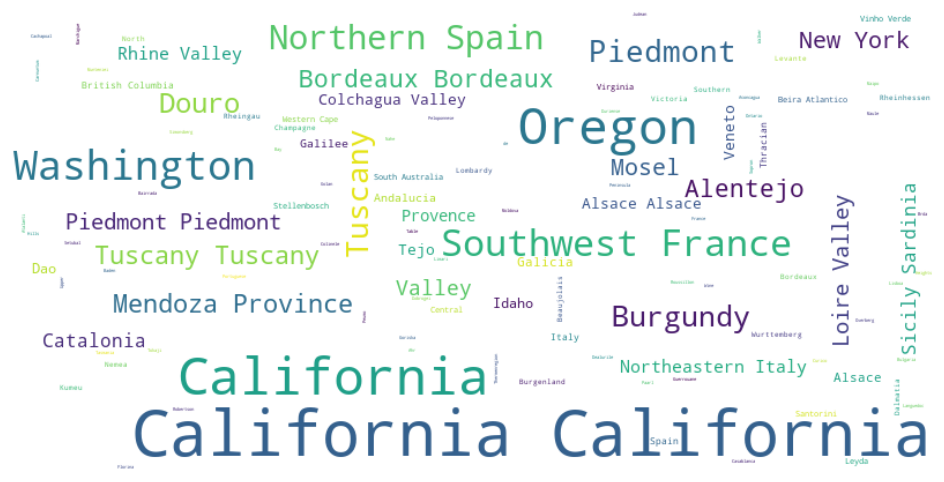

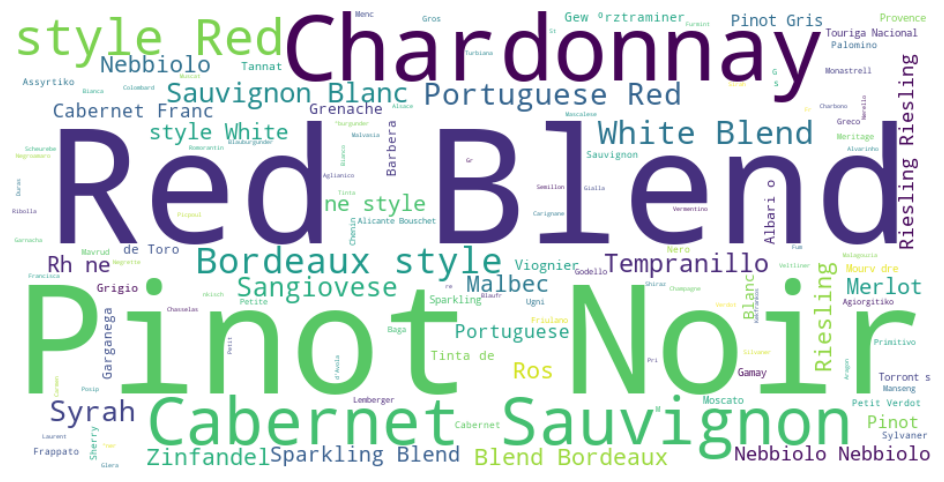

In [25]:
# Define a function to create a word cloud from a text column
def create_wordcloud(text):
    # Create a WordCloud object with default settings
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Create word clouds for the "province" and "variety" columns
create_wordcloud(' '.join(df['province'].dropna().values))
create_wordcloud(' '.join(df['variety'].dropna().values))

